
# **🧼🫧🧹 Data Cleaning**

<img src="../assets/banner_data_cleaning.png" style="width:95%">

- **Data Cleaning** is a critical step in preparing your dataset for meaningful analysis and modeling.  

- A well-cleaned dataset reduces bias, improves model performance, and prevents misleading conclusions.  

- This notebook uses **manual coding** to ensure each feature is properly reviewed and cleaned.  

- Make sure to update the `data_file_path`, `identifier_column` and `target_column` entries in your `config.yaml` file before running the notebook.
        

---
---
**📦 Import General Libraries**

In [1]:
import pandas as pd

---
**⚙️ Configure Imports**

In [2]:
import sys
from pathlib import Path

# Add project root to sys.path
project_root = Path().resolve().parent  # if running from folder with parent directory as project root
sys.path.append(str(project_root))

---
**🔧 Configure Notebook**

In [3]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'  # Show all outputs in a cell

---
**🔧 Import Pipeline Classes**

In [4]:
from src.data_explorer import DataExplorer
from src.data_cleaner import DataCleaner

explorer = DataExplorer()
cleaner = DataCleaner()

---
**🚀 Load Config from `config.yaml`**

In [5]:
import yaml

config_path = "../config.yaml"
with open(config_path, "r", encoding="utf-8") as file:
    config = yaml.safe_load(file)

DATA_FILE_PATH = config["data_file_path"]
IDENTIFIER_COLUMN = config["identifier_column"]
TARGET_COLUMN = config["target_column"]
RANDOM_STATE = config["random_state"]
TEST_SIZE = config["test_size"]

---
**📥 Load Data into Pandas DataFrame**

In [6]:
RELATIVE_FILE_PATH = Path("../", DATA_FILE_PATH)

df = pd.read_csv(RELATIVE_FILE_PATH)
df.head()

,Unnamed: 0,Risk_Category,Age,Gender,Comorbidities,Length_of_Stay,Smoking_Status,Medication_Adherence,Socioeconomic_Status,Number_of_Previous_Admissions
0,0,High-risk,63.0,Male,4.0,7 days,Non-smoker,Low,Low,5.0
1,1,High-risk,67.0,Male,3.0,2 days,Non-smoker,Low,Low,4.0
2,2,Low-risk,34.0,Female,1.0,7 days,Non-smoker,Medium,Medium,5.0
3,3,High-risk,63.0,Male,5.0,3 days,Smoker,Medium,Medium,2.0
4,4,High-risk,45.0,Female,1.0,7 days,Smoker,High,Low,3.0


---
---
# **🧼 1. Apply Snake Case**

- Using `snake_case` aligns with PEP 8, Python’s official style guide for code readability and consistency.

- It ensures column names are consistent and easy to read, avoiding spaces or special characters that can break code.

- Standardized naming makes data manipulation, merging, and referencing columns in scripts much smoother.

- Following PEP 8 conventions improves code maintainability, readability, and reduces potential errors in data pipelines.

In [7]:
df_cleaned = cleaner.clean_all(df=df, mode="snake_case_columns")
df_cleaned.columns

   └── Cleaning mode='snake_case_columns' completed in 0.00 seconds


Index(['unnamed_0', 'risk_category', 'age', 'gender', 'comorbidities',
       'length_of_stay', 'smoking_status', 'medication_adherence',
       'socioeconomic_status', 'number_of_previous_admissions'],
      dtype='object')

**└─ 💡 Observations / Insights ──**

- Column names successfully amended

---
---
# **🧼 2. Rearrange Columns**

- Move the **target column** to the front for easier reference.  

- Keeps the dataset organized and makes analysis or model training steps more intuitive.

In [8]:
# df_cleaned = cleaner.clean_all(df=df_cleaned, mode="rearrange_columns")
# df_cleaned.head(1)

**└─ 💡 Observations / Insights ──**

- Columns successfully rearranged

---
---
# **🧼 3. Drop Irrelevant Features**

- Remove columns that do not contribute to the analysis (e.g., IDs).  

- Drop **post-hoc features** that won’t be available at prediction time to avoid **data leakage**.  

- Example: When predicting `resale_price`, exclude `resale_price_USD` since it’s just a transformed version of the target.

In [9]:
df_cleaned.columns

Index(['unnamed_0', 'risk_category', 'age', 'gender', 'comorbidities',
       'length_of_stay', 'smoking_status', 'medication_adherence',
       'socioeconomic_status', 'number_of_previous_admissions'],
      dtype='object')

In [10]:
df_cleaned = cleaner.clean_all(df=df_cleaned, mode="irrelevant")
print("\n", df_cleaned.columns)

   └── Dropping irrelevant columns: unnamed_0
   └── Cleaning mode='irrelevant' completed in 0.00 seconds

 Index(['risk_category', 'age', 'gender', 'comorbidities', 'length_of_stay',
       'smoking_status', 'medication_adherence', 'socioeconomic_status',
       'number_of_previous_admissions'],
      dtype='object')


**└─ 💡 Observations / Insights ──**

- Irrelevant features successfully dropped

---
---
# **🧼 4. Explore Target Variable**

- Examine the **distribution** of the target variable.  
  - For regression: check spread, skewness, and outliers.  
  - For classification: review class balance and frequency counts.  

- Detect potential **issues** (e.g., extreme outliers in regression, class imbalance in classification).  

- Consider whether **transformations** (e.g., log-scaling for regression, class grouping for classification) are needed to improve analysis or model performance.

🔎 Univariate Analysis for 'risk_category' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 2
📋 Unique Values List: ['High-risk', 'Low-risk']
📊 Frequency Table:


,Count,Percentage (%)
Low-risk,"7,008",69.39
High-risk,"3,091",30.61



⚠️  Missing values: 1/10100 (0.01%)


,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
4683,NaN,52.0,Male,1.0,2 days,Non-smoker,Medium,High,3.0


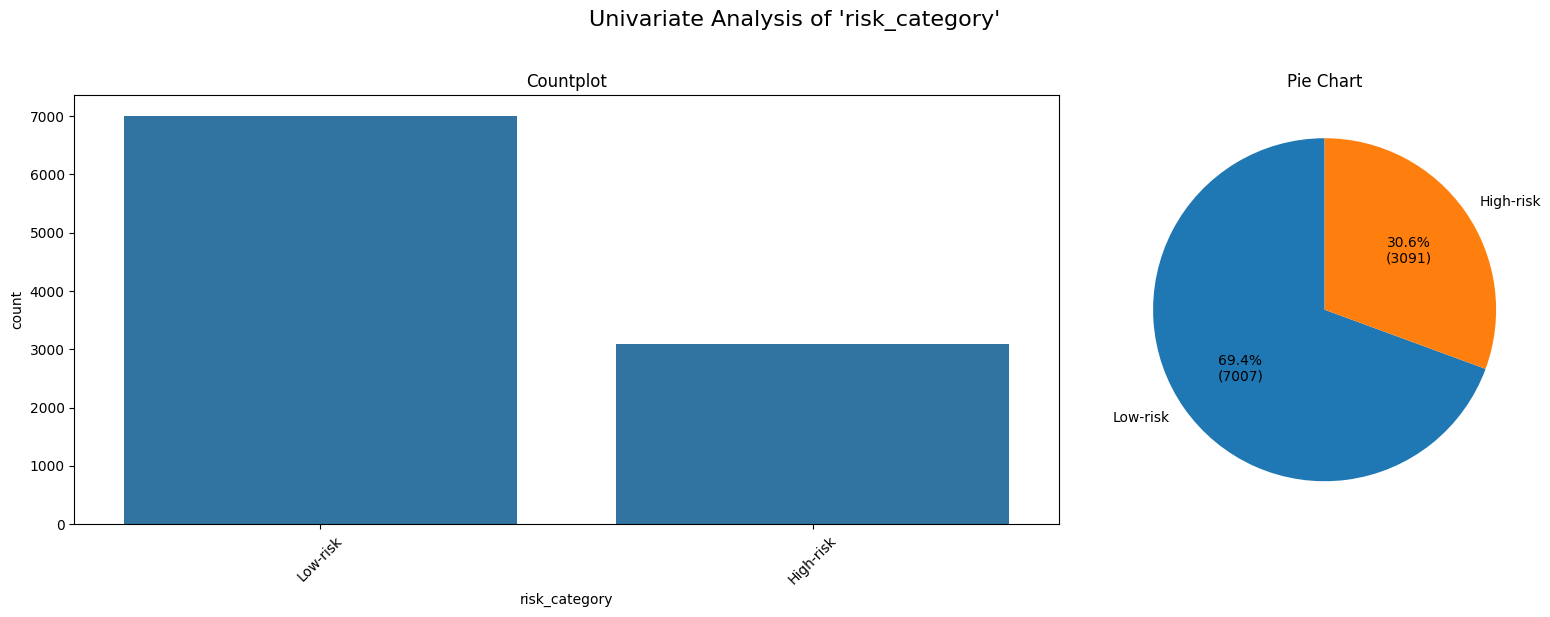

In [11]:
# Get snake case version of target name
target_column_snake_case = cleaner.convert_column_names_to_snake_case(df=df[[TARGET_COLUMN]])
target_column_name = target_column_snake_case.columns[0]

explorer.perform_univariate_analysis(df=df_cleaned, feature=target_column_name, show_plots=True)

**└─ 💡 Observations / Insights ──**

- Only one missing value → safe to drop.

- Minor class imbalance (70:30) → acceptable to retain.

- Use stratified splitting when dividing data into training and test sets.

- Consider experimenting with resampling techniques if needed (e.g., random upsampling, SMOTE).

---
## **└─ 🫧 Clean Feature (1)**

- Remove missing values

- Convert to binary (1 = "High Risk", 0 = "Low Risk)

In [ ]:
df_cleaned = cleaner.clean_all(df=df_cleaned, mode="clean_target")
df_cleaned.isnull().sum()
df_cleaned["risk_category"].value_counts()

   └── Dropped 1 rows (0.01%) with missing values in column(s): risk_category
   └── Mapping values for columns: ['risk_category']
   └── Column 'risk_category': 10099 values updated
       └── Mapping: 'Low-risk' → 0, 'High-risk' → 1
   └── Cleaning mode='clean_target' completed in 0.00 seconds


risk_category                    0
age                              1
gender                           2
comorbidities                    3
length_of_stay                   2
smoking_status                   0
medication_adherence             1
socioeconomic_status             0
number_of_previous_admissions    0
dtype: int64

**└─ 💡 Observations / Insights ──**

- Successfully removed and binarized.

---
---
# **🧼 5. Explore `age`**

- The age of the patient.

🔎 Univariate Analysis for 'age' (Type: numerical)

📘 Data Type: float64
💎 Unique Non-NA: 101
📊 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
age,10098.00,57.96,791.23,-22964.00,41.00,49.00,58.00,62034.00


📈 Skewness: 57.78 ⚠️ (> 1.0)
📈 Kurtosis: 4397.64 ⚠️ (> 3.0)

🔍 Outlier Detection: IQR Method (1.5 × IQR)
   └── Bounds: [15.50, 83.50]
   └── ⚠️ 62 outliers found (0.61% of rows)

⚠️  Missing values: 1/10099 (0.01%)


,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
7866,1,NaN,Female,2.0,5 days,Smoker,Medium,Medium,1.0


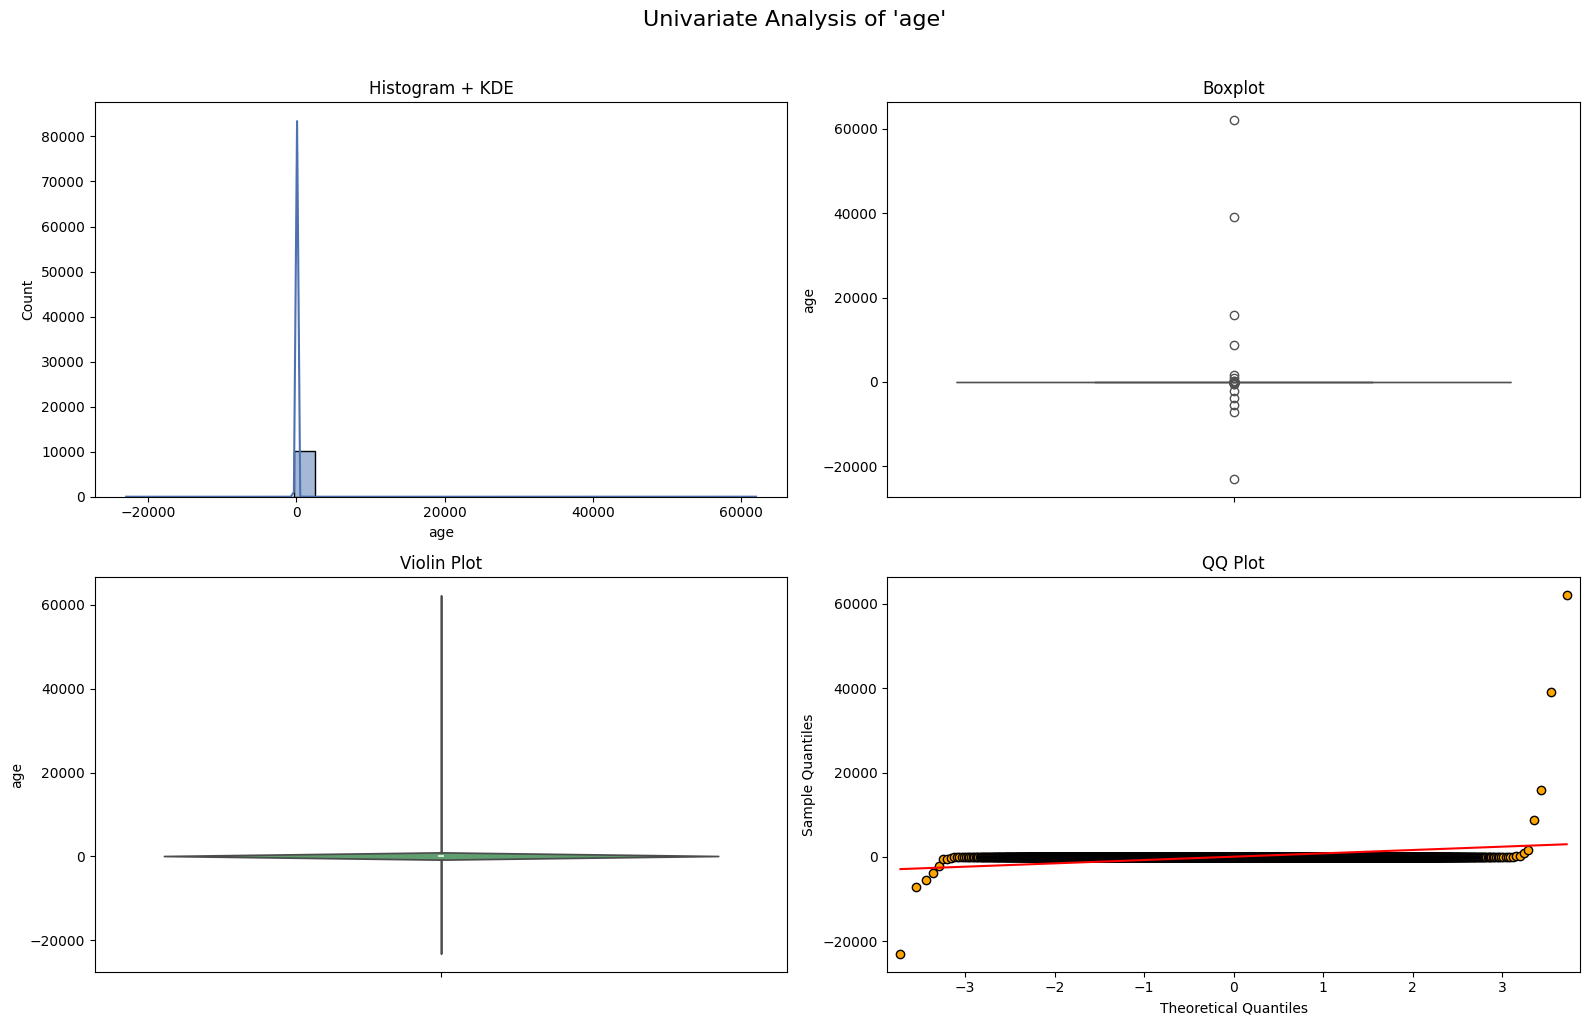

In [14]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="age", show_plots=True)

**└─ 💡 Observations / Insights ──**

- Some values appear erroneous (e.g., negative ages or unrealistically high numbers) and should be corrected, as humans cannot have such ages.

- One missing value detected → safe to remove.

- Current plots are not reliable; will clean the data first and review the plots afterward.

In [15]:
df_negative = df_cleaned[df_cleaned['age'] <= 0]
df_negative

,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
986,0,-50.0,Female,2.0,2 days,Smoker,Medium,Medium,1.0
1304,0,-201.0,Male,1.0,5 days,Non-smoker,Lo,Medium,2.0
3742,0,-3825.0,Female,4.0,4 days,Smoker,Low,Medium,1.0
4504,0,-7050.0,Male,0.0,4 days,Smoker,High,Medium,1.0
6599,0,-46.0,Female,5.0,2 days,Non-smoker,High,Medium,0.0
6773,1,-5428.0,Female,4.0,7 days,Smoker,Low,Low,4.0
7393,0,-52.0,Female,5.0,3 days,Smoker,High,Medium,1.0
7507,0,-2209.0,Male,3.0,3 days,Non-smoker,Medium,Medium,1.0
7858,0,-41.0,Female,0.0,2 days,Non-smoker,High,High,0.0
8341,0,-22964.0,Male,4.0,2 days,Non-smoker,Medium,Medium,0.0


**└─ 💡 Observations / Insights ──**

- A few extremely high negative values likely represent data entry errors. Since they are few relative to the dataset, they can be safely removed.

- Negative values less than -100 might be mistyped ages, but for consistency and simplicity, these can also be removed.

In [16]:
df_high_positive = df_cleaned[df_cleaned['age'] >= 100]
df_high_positive

,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
1133,1,38990.0,Male,3.0,3 days,Non-smoker,Low,Low,3.0
1156,0,196.0,Male,5.0,2 days,Non-smoker,High,Medium,1.0
1219,1,15927.0,Female,4.0,5 days,Smoker,High,Medium,4.0
2084,1,1602.0,Female,5.0,4 days,Smoker,Medium,Medium,0.0
3835,0,62034.0,Male,1.0,5 days,Non-smoker,Medium,Medium,2.0
7241,1,890.0,Female,5.0,4 days,Smoker,Low,Medium,5.0
8043,1,105.0,Female,2.0,7 days,Smoker,Low,High,4.0
8151,1,8761.0,Female,4.0,7 days,Non-smoker,Low,Medium,2.0


**└─ 💡 Observations / Insights ──**

- A few extremely high values are likely erroneous and can be removed.

- The value 105 can be retained, as it represents a plausible human age.

---
## **└─ 🫧 Clean Feature (1)**

- Drop missing values
- Remove all negative values
- Remove ages above 105

In [17]:
df_cleaned = cleaner.clean_all(df=df_cleaned, mode="clean_age")

df_cleaned['age'].nsmallest(3)
df_cleaned['age'].nlargest(3)

   └── Dropped 1 rows (0.01%) with missing values in column(s): age
   └── Removed 19 out-of-range rows in 'age'.
   └── Cleaning mode='clean_age' completed in 0.00 seconds


1874     6.0
4694     8.0
414     12.0
Name: age, dtype: float64

8043    105.0
4908     93.0
6146     93.0
Name: age, dtype: float64

**└─ 💡 Observations / Insights ──**

- All negative and extremely high values removed.

🔎 Univariate Analysis for 'age' (Type: numerical)

📘 Data Type: float64
💎 Unique Non-NA: 82
📊 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
age,10079.00,49.58,12.24,6.00,41.00,49.00,58.00,105.00


📈 Skewness: 0.18
📈 Kurtosis: -0.16

🔍 Outlier Detection: Z-Score Method (|z| > 3)
   └── Bounds: [12.87, 86.30]
   └── ⚠️ 14 outliers found (0.14% of rows)

✅ No rows with missing values found.


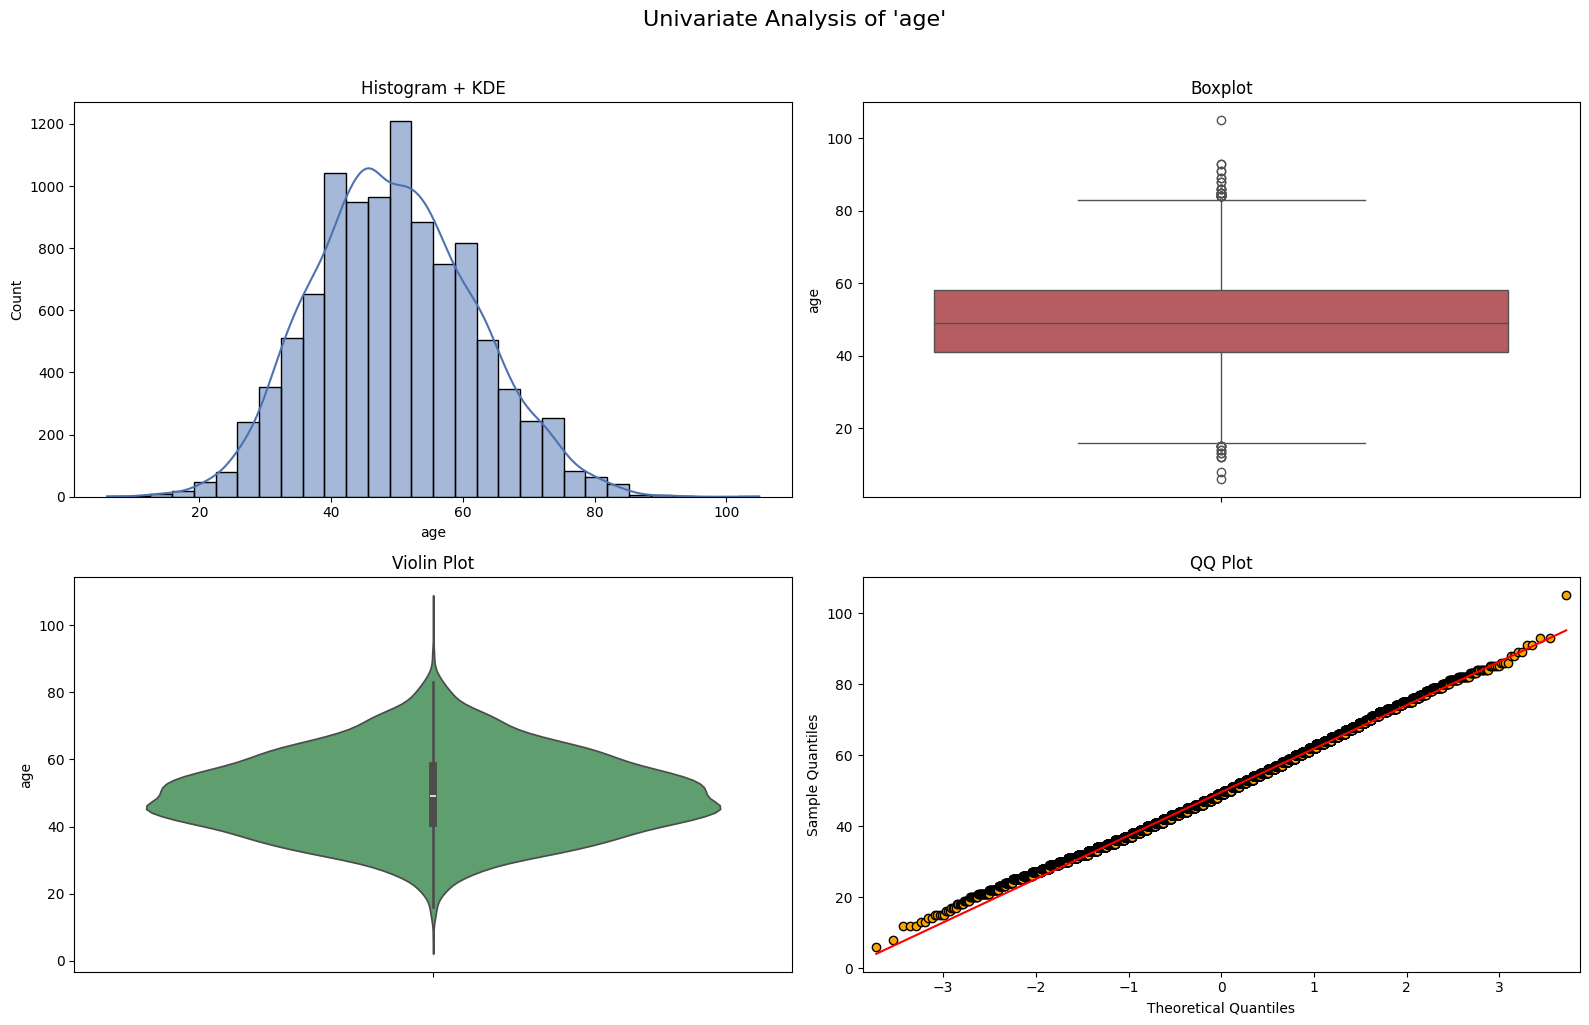

In [18]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="age", show_plots=True)

**└─ 💡 Observations / Insights ──**

- The plot looks clean, and the age distribution appears approximately normal.

- A few outliers remain, but all ages fall within a reasonable range, so they can be retained.

---
---
# **🧼 6. Explore `gender`**

- The gender of the patient.

🔎 Univariate Analysis for 'gender' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 2
📋 Unique Values List: ['Male', 'Female']
📊 Frequency Table:


,Count,Percentage (%)
Male,"5,090",50.51
Female,"4,987",49.49



⚠️  Missing values: 2/10079 (0.02%)


,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
3654,1,84.0,NaN,2.0,3 days,Smoker,Low,Medium,3.0
6762,0,61.0,NaN,2.0,7 days,Non-smoker,High,High,2.0


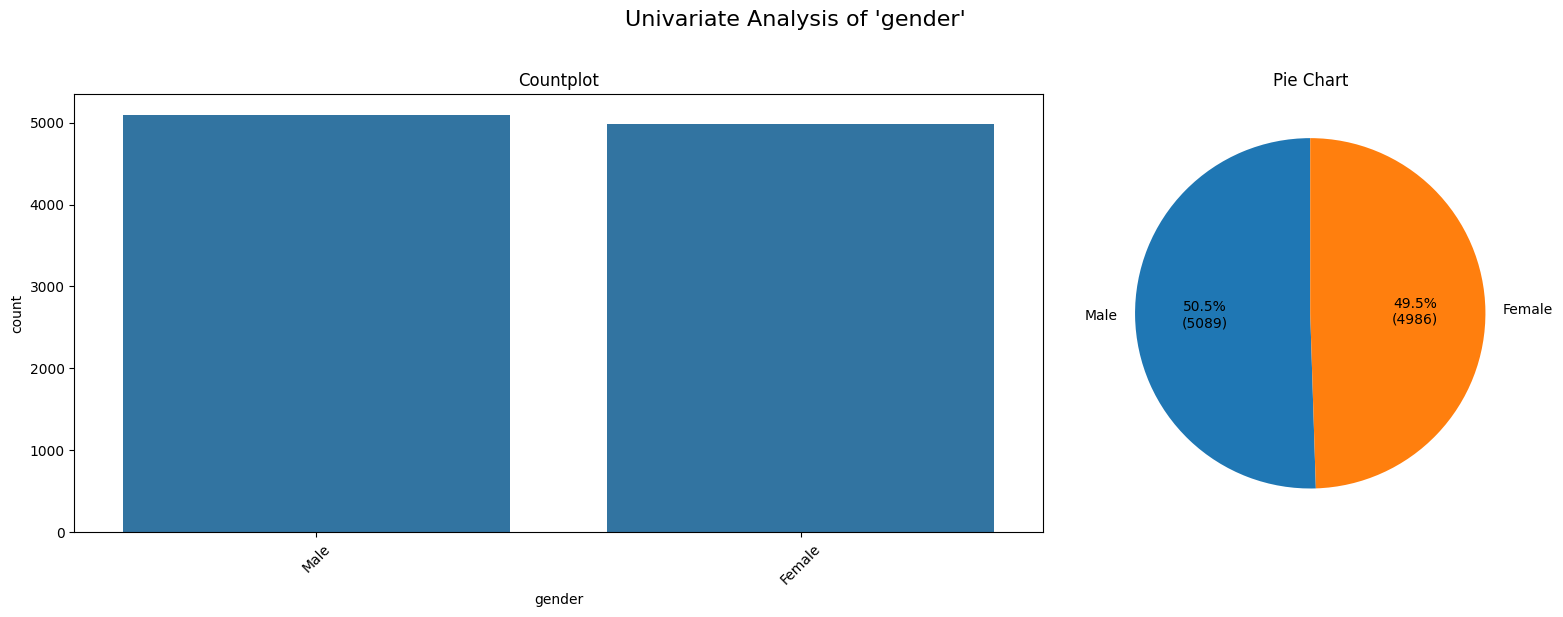

In [19]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="gender", show_plots=True)

**└─ 💡 Observations / Insights ──**

- There are only 2 missing values - safe to remove

- The distribution is rather balanced with about 50% of the population representing the male and female population. 

---
## **└─ 🫧 Clean Feature (1)**

- Remove the missing values

In [20]:
df_cleaned = cleaner.clean_all(df=df_cleaned, mode="clean_gender")
df_cleaned["gender"].isnull().sum()

   └── Dropped 2 rows (0.02%) with missing values in column(s): gender
   └── Cleaning mode='clean_gender' completed in 0.00 seconds


np.int64(0)

**└─ 💡 Observations / Insights ──**

- Missing values are removed successfully.

---
---
# **🧼 8. Explore `comorbidities`**

- The number of comorbid conditions the patient has.

🔎 Univariate Analysis for 'comorbidities' (Type: numerical)

📘 Data Type: float64
💎 Unique Non-NA: 27
📊 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
comorbidities,10074.00,2.80,95.27,-6083.00,1.00,2.00,3.00,5019.00


📈 Skewness: -1.01 ⚠️ (> 1.0)
📈 Kurtosis: 2804.42 ⚠️ (> 3.0)

🔍 Outlier Detection: IQR Method (1.5 × IQR)
   └── Bounds: [-2.00, 6.00]
   └── ⚠️ 20 outliers found (0.20% of rows)

⚠️  Missing values: 3/10077 (0.03%)


,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
37,0,35.0,Male,NaN,4 days,Non-smoker,High,Low,0.0
5765,0,44.0,Female,NaN,2 days,Non-smoker,High,Medium,0.0
8702,0,23.0,Male,NaN,2 days,Non-smoker,High,Medium,0.0


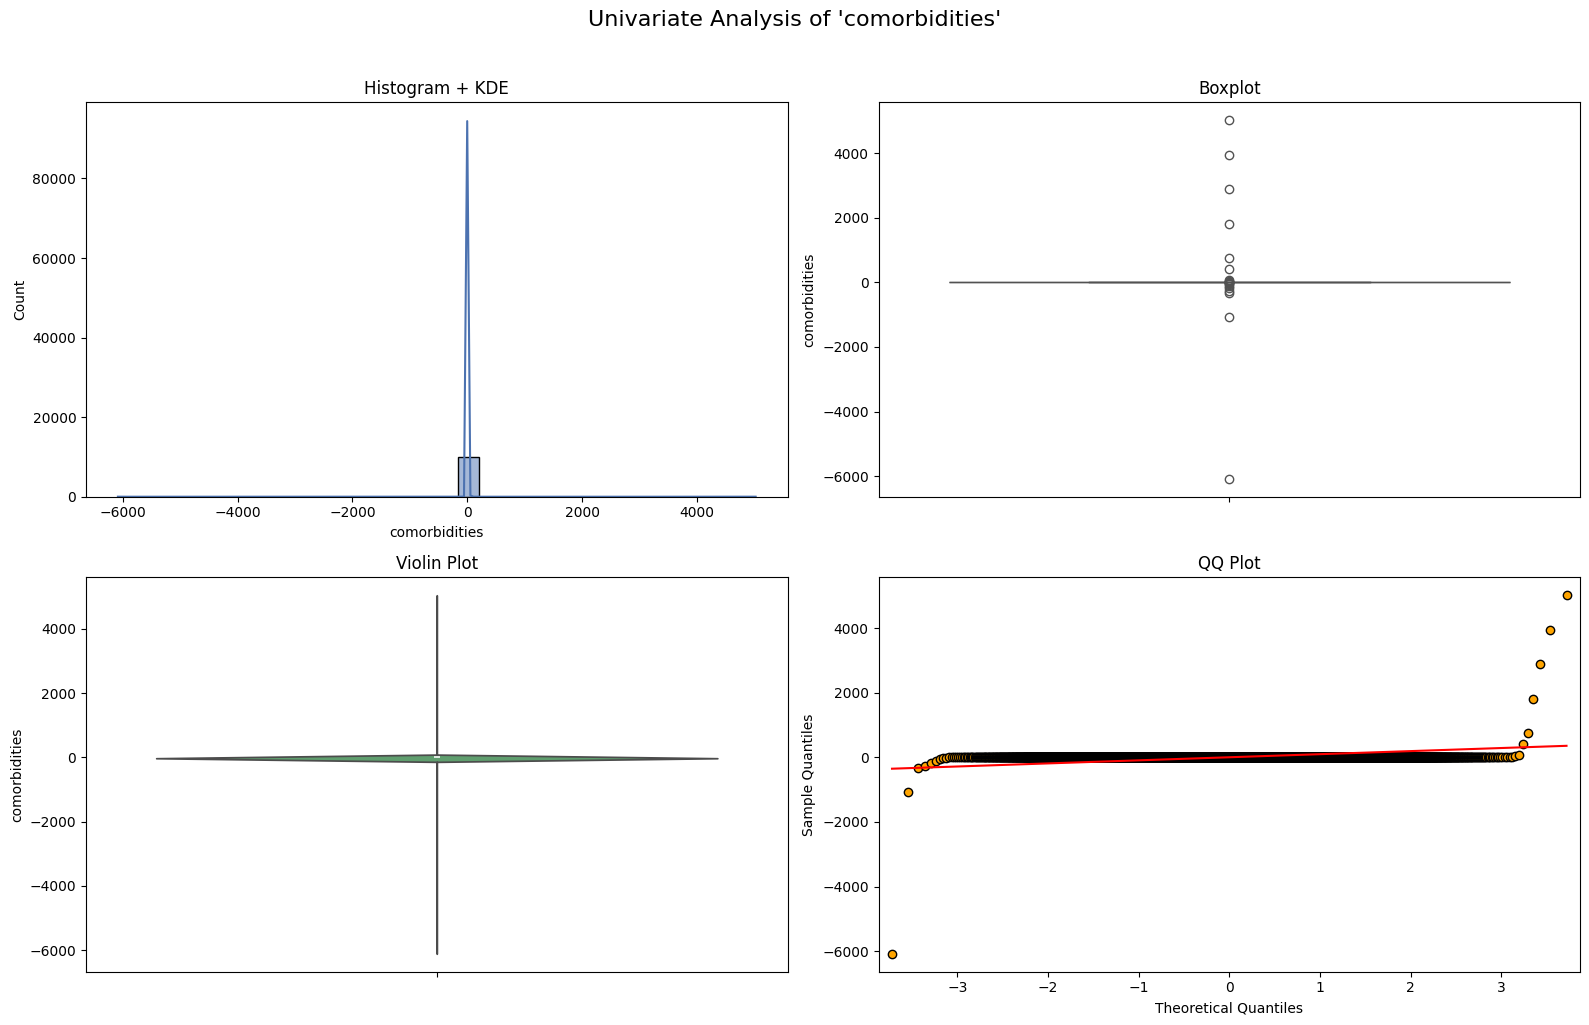

In [21]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="comorbidities", show_plots=True)

**└─ 💡 Observations / Insights ──**

- There are 3 missing values that can be removed safely.

- The chart is not analyzable now as there are outliers and erroneous values that make the graphs unreadable.

In [22]:
df_cleaned_negative = df_cleaned[df_cleaned['comorbidities'] < 0]
print("Number of Negatives:", df_cleaned_negative.shape[0])
df_cleaned_negative

Number of Negatives: 11


,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
317,0,49.0,Female,-1.0,2 days,Non-smoker,Medium,Low,0.0
1731,0,28.0,Female,-1067.0,2 days,Non-smoker,Medium,High,3.0
2202,1,54.0,Male,-12.0,7 days,Non-smoker,High,Low,0.0
3796,0,43.0,Male,-42.0,4 days,Non-smoker,Low,Low,0.0
4284,1,52.0,Male,-5.0,5 days,Non-smoker,Medium,Low,1.0
5299,1,60.0,Male,-6083.0,7 days,Non-smoker,Medium,Low,3.0
5698,0,49.0,Male,-187.0,2 days,Non-smoker,Medium,Medium,1.0
6085,1,47.0,Female,-114.0,5 days,Non-smoker,Low,Low,1.0
6604,1,53.0,Female,-3.0,4 days,Non-smoker,Medium,Medium,2.0
6948,0,41.0,Female,-330.0,7 days,Non-smoker,Medium,Medium,0.0


**└─ 💡 Observations / Insights ──**

- A few extremely high negative values likely represent data entry errors. Since they are few relative to the dataset, they can be safely removed.

- Small negative values less might be amounts incorrectly typed with a minus sign, but for consistency and simplicity, these can also be removed.

In [23]:
df_cleaned_high_positives = df_cleaned[df_cleaned["comorbidities"] > 5]
print("Number of High Positives:", df_cleaned_high_positives.shape[0])
df_cleaned_high_positives

Number of High Positives: 10


,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
644,0,36.0,Female,1809.0,3 days,Non-smoker,Medium,High,5.0
647,0,51.0,Male,5019.0,7 days,Smoker,Low,Medium,0.0
727,0,46.0,Male,28.0,5 days,Non-smoker,Medium,Low,0.0
1525,0,35.0,Female,405.0,3 days,Non-smoker,Medium,Medium,1.0
2267,1,64.0,Male,739.0,7 days,Non-smoker,Medium,Medium,4.0
3219,1,73.0,Male,11.0,7 days,Smoker,Low,Low,2.0
4046,0,45.0,Male,3950.0,3 days,Smoker,Low,Medium,0.0
4506,0,38.0,Male,73.0,3 days,Non-smoker,Medium,Medium,0.0
6723,0,33.0,Female,7.0,3 days,Non-smoker,Medium,Medium,0.0
9404,0,53.0,Male,2879.0,2 days,Non-smoker,Medium,High,0.0


**└─ 💡 Observations / Insights ──**

- Those above 20 can be assumed to be erroneous values, but need to be fact checked with domain experts in the future.

- For example, it would be logically unsound from an untrained third perspective for someone to have 28 commorbidities but yet be a low-risk.

---
## **└─ 🫧 Clean Feature (1)**

- Drop missing values
- Remove all negative values
- Remove ages above 20

In [24]:
df_cleaned = cleaner.clean_all(df=df_cleaned, mode="clean_comorbidities")
df_cleaned.shape
df_cleaned["comorbidities"].nsmallest(3)
df_cleaned["comorbidities"].nlargest(3)

   └── Dropped 3 rows (0.03%) with missing values in column(s): comorbidities
   └── Removed 19 out-of-range rows in 'comorbidities'.
   └── Cleaning mode='clean_comorbidities' completed in 0.00 seconds


(10055, 9)

7     0.0
12    0.0
15    0.0
Name: comorbidities, dtype: float64

3219    11.0
6723     7.0
3        5.0
Name: comorbidities, dtype: float64

**└─ 💡 Observations / Insights ──**

- Missing values and out-of-ranges values removed.

🔎 Univariate Analysis for 'comorbidities' (Type: numerical)

📘 Data Type: float64
💎 Unique Non-NA: 8
📊 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
comorbidities,10055.00,2.13,1.56,0.00,1.00,2.00,3.00,11.00


📈 Skewness: 0.23
📈 Kurtosis: -0.95

🔍 Outlier Detection: Z-Score Method (|z| > 3)
   └── Bounds: [-2.55, 6.80]
   └── ⚠️ 2 outliers found (0.02% of rows)

✅ No rows with missing values found.


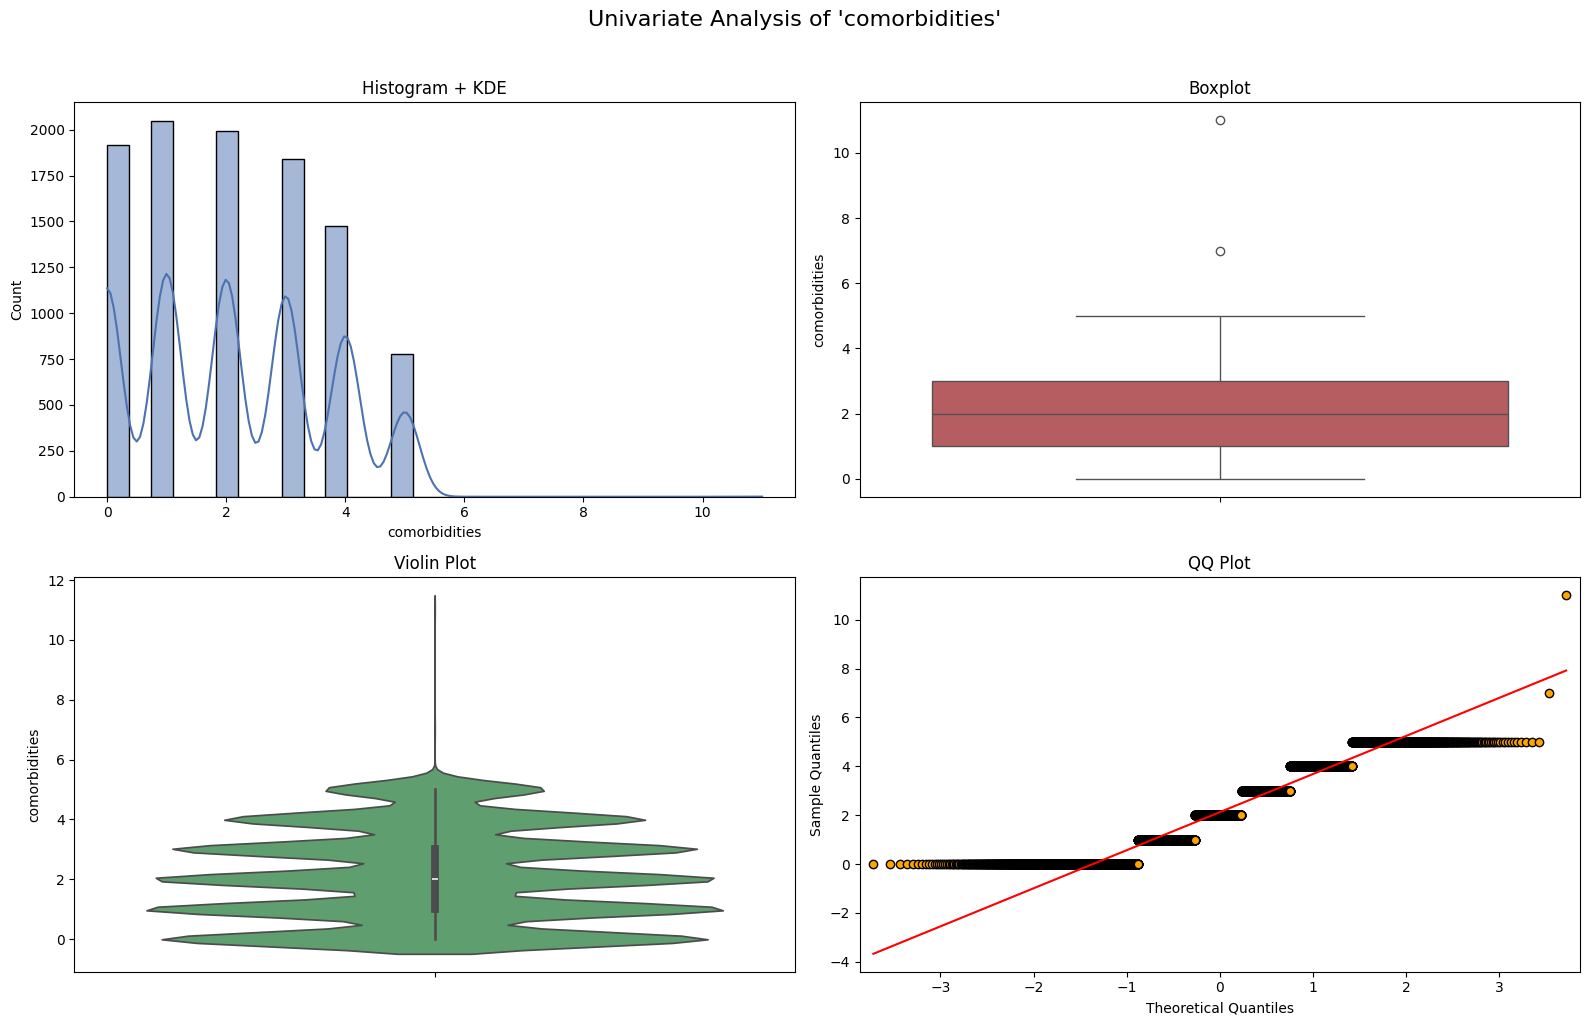

In [25]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="comorbidities", show_plots=True)

**└─ 💡 Observations / Insights ──**

- The values are discrete and shows a general downward trend.

- There is some outliers and this seems to follow a poisson distribution.

---
---
# **🧼 9. Explore `length_of_stay`**

- The duration of the patient's last hospital stay.

🔎 Univariate Analysis for 'length_of_stay' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 5
📋 Unique Values List: ['7 days', '2 days', '3 days', '4 days', '5 days']
📊 Frequency Table:


,Count,Percentage (%)
2 days,"2,348",23.36
3 days,"2,189",21.77
4 days,"2,038",20.27
5 days,"1,843",18.33
7 days,"1,635",16.26



⚠️  Missing values: 2/10055 (0.02%)


,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
3006,0,47.0,Female,1.0,NaN,Non-smoker,Medium,High,0.0
7962,1,74.0,Female,3.0,NaN,Non-smoker,Medium,Medium,0.0


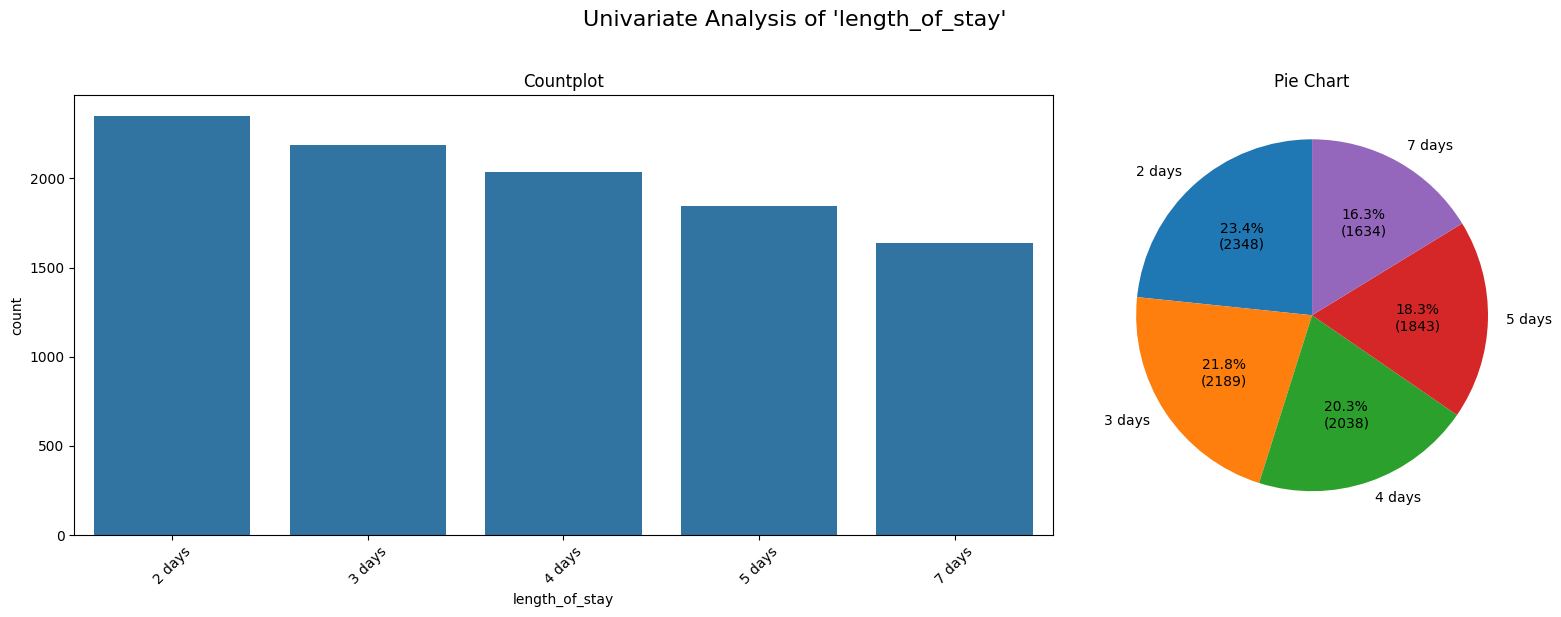

In [26]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="length_of_stay", show_plots=True)

**└─ 💡 Observations / Insights ──**

- There are 2 missing values.

- There is a clear trend of reduction in counts as the length increases.

- To change this to numerical format as well and remove the days.

---
## **└─ 🫧 Clean Feature (1)**

- Remove missing values
- Remove the `days` suffix
- Convert to int type

In [27]:
df_cleaned = cleaner.clean_all(df=df_cleaned, mode="clean_length_of_stay")
df_cleaned["length_of_stay"].dtype
df_cleaned["length_of_stay"].isnull().sum()
df_cleaned.head()

   └── Dropped 2 rows (0.02%) with missing values in column(s): length_of_stay
   └── Replacing ' days' with '' in columns: ['length_of_stay']
       └── Column 'length_of_stay': 10053 values updated
   └── Converting columns to specified data types...
       └── Converting 'length_of_stay' to '<class 'int'>'
   └── Cleaning mode='clean_length_of_stay' completed in 0.01 seconds


dtype('int64')

np.int64(0)

,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
0,1,63.0,Male,4.0,7,Non-smoker,Low,Low,5.0
1,1,67.0,Male,3.0,2,Non-smoker,Low,Low,4.0
2,0,34.0,Female,1.0,7,Non-smoker,Medium,Medium,5.0
3,1,63.0,Male,5.0,3,Smoker,Medium,Medium,2.0
4,1,45.0,Female,1.0,7,Smoker,High,Low,3.0


**└─ 💡 Observations / Insights ──**

- All of the issues are appropriately addressed.

🔎 Univariate Analysis for 'length_of_stay' (Type: numerical)

📘 Data Type: int64
💎 Unique Non-NA: 5
📊 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
length_of_stay,10053.00,3.99,1.67,2.00,3.00,4.00,5.00,7.00


📈 Skewness: 0.56
📈 Kurtosis: -0.77

🔍 Outlier Detection: Z-Score Method (|z| > 3)
   └── Bounds: [-1.03, 9.01]
   └── ✅ No outliers detected.

✅ No rows with missing values found.


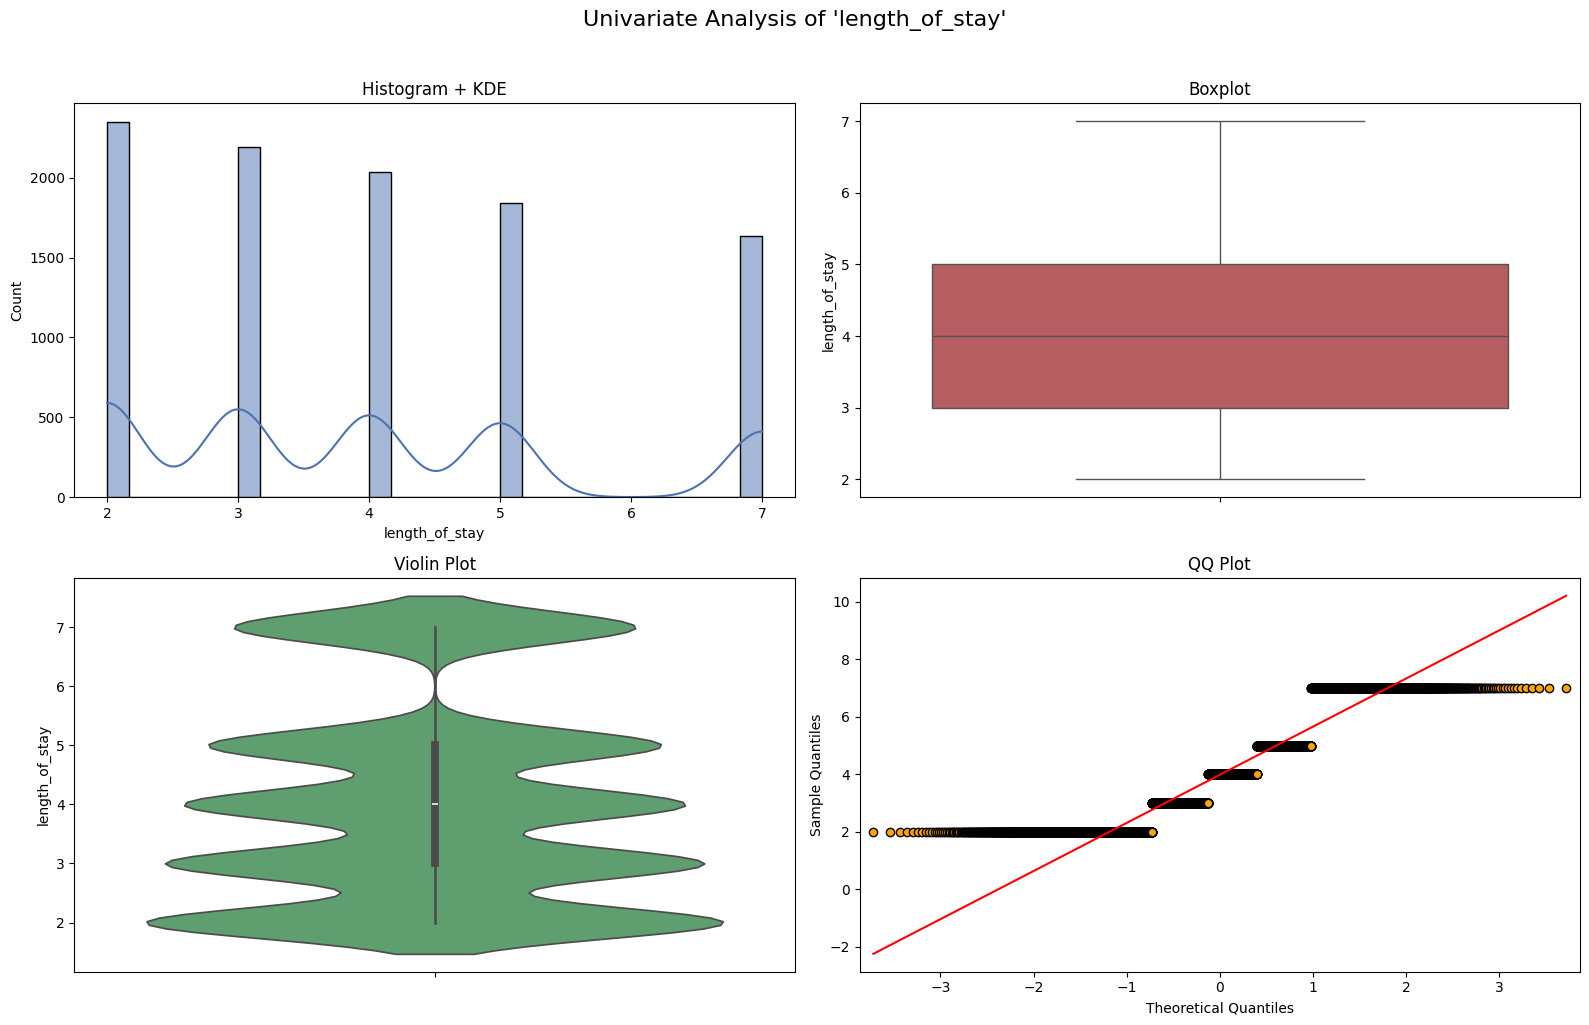

In [28]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="length_of_stay", show_plots=True)

**└─ 💡 Observations / Insights ──**

- No outliers detected.

- Distribution seems fine.

---
---
# **🧼 10. Explore `smoking_status`**

- Whether the patient is a smoker or non-smoker.

🔎 Univariate Analysis for 'smoking_status' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 2
📋 Unique Values List: ['Non-smoker', 'Smoker']
📊 Frequency Table:


,Count,Percentage (%)
Non-smoker,"6,834",67.98
Smoker,"3,219",32.02



✅ No rows with missing values found.


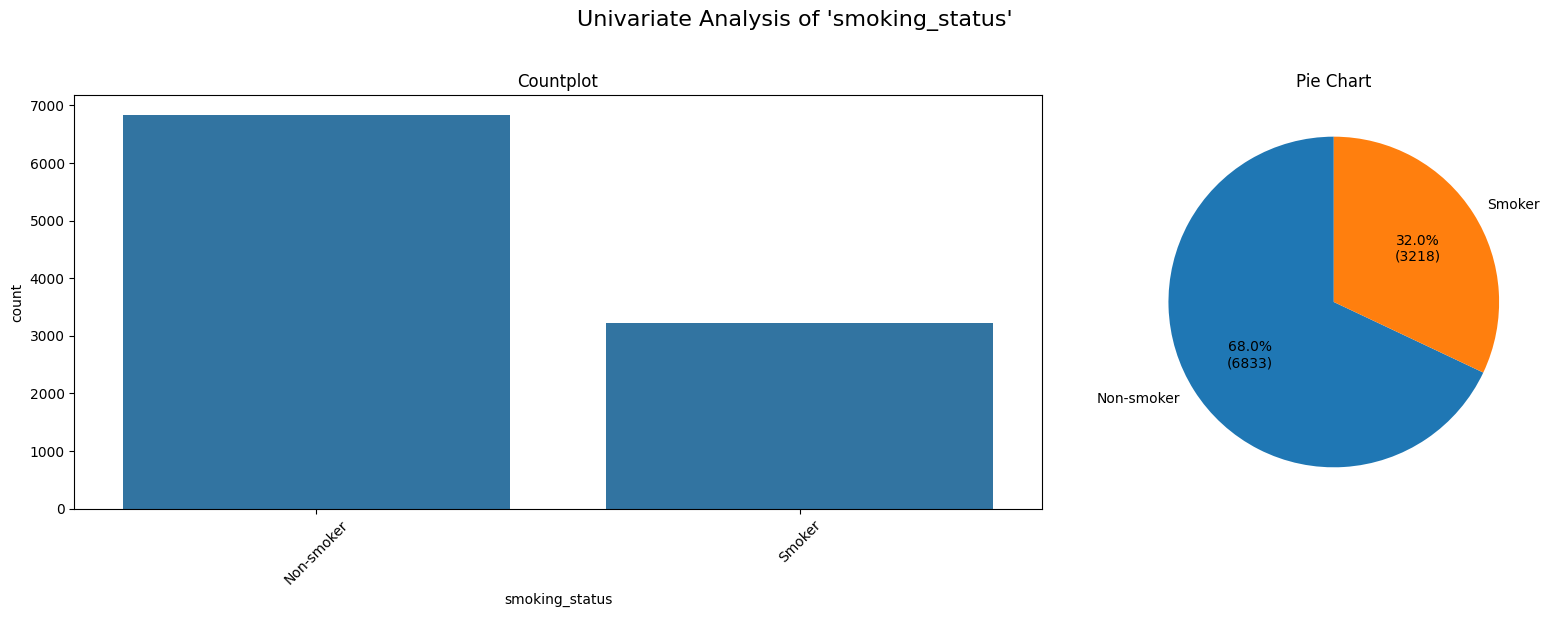

In [29]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="smoking_status", show_plots=True)

**└─ 💡 Observations / Insights ──**

- The distribution is fine and seems to not have any issues.

---
---
# **🧼 11. Explore `medication_adherence`**

- A score representing how well the patient follows their medication regimen.

🔎 Univariate Analysis for 'medication_adherence' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 6
📋 Unique Values List: ['Low', 'Medium', 'High', 'Mediu', 'Lo', 'Hig']
📊 Frequency Table:


,Count,Percentage (%)
Medium,"5,065",50.39
Low,"2,479",24.66
High,"2,409",23.97
Mediu,51,0.51
Hig,28,0.28
Lo,20,0.20


⚠️  Rare Categories (<1%): 3 found

⚠️  Missing values: 1/10053 (0.01%)


,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
639,1,65.0,Male,4.0,5,Smoker,NaN,Low,3.0


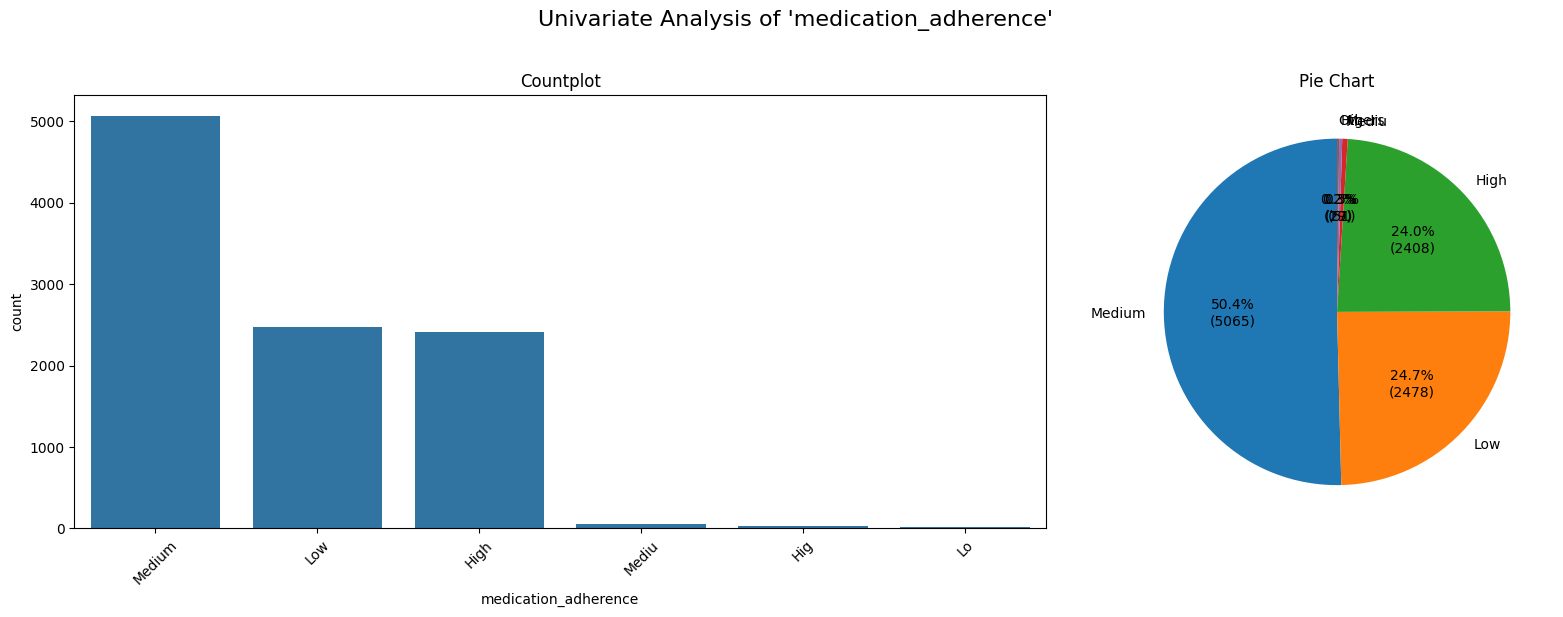

In [30]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="medication_adherence", show_plots=True)

**└─ 💡 Observations / Insights ──**

- Some of the labels are truncated wrongly, to replace them to the correct ones.

- There are some missing values - okay to remove due to low amount.

---
## **└─ 🫧 Clean Feature (1)**

- Remove the missing values

- Correct the labels

In [31]:
df_cleaned = cleaner.clean_all(df=df_cleaned, mode="clean_medication_adherence")
df_cleaned

   └── Dropped 1 rows (0.01%) with missing values in column(s): medication_adherence
   └── Mapping values for columns: ['medication_adherence']
   └── Column 'medication_adherence': 99 values updated
       └── Mapping: 'Mediu' → 'Medium', 'Lo' → 'Low', 'Hig' → 'High'
       └── ⚠️ Unmapped categories in 'medication_adherence': ['High', 'Low', 'Medium']
   └── Cleaning mode='clean_medication_adherence' completed in 0.01 seconds


,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
0,1,63.0,Male,4.0,7,Non-smoker,Low,Low,5.0
1,1,67.0,Male,3.0,2,Non-smoker,Low,Low,4.0
2,0,34.0,Female,1.0,7,Non-smoker,Medium,Medium,5.0
3,1,63.0,Male,5.0,3,Smoker,Medium,Medium,2.0
4,1,45.0,Female,1.0,7,Smoker,High,Low,3.0
...,...,...,...,...,...,...,...,...,...
10095,0,54.0,Male,2.0,5,Non-smoker,High,Medium,1.0
10096,0,40.0,Male,0.0,7,Non-smoker,Medium,High,2.0
10097,0,33.0,Female,0.0,2,Non-smoker,Medium,High,3.0
10098,0,49.0,Male,0.0,7,Non-smoker,Medium,Medium,3.0


🔎 Univariate Analysis for 'medication_adherence' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 3
📋 Unique Values List: ['Low', 'Medium', 'High']
📊 Frequency Table:


,Count,Percentage (%)
Medium,"5,116",50.90
Low,"2,499",24.86
High,"2,437",24.24



✅ No rows with missing values found.


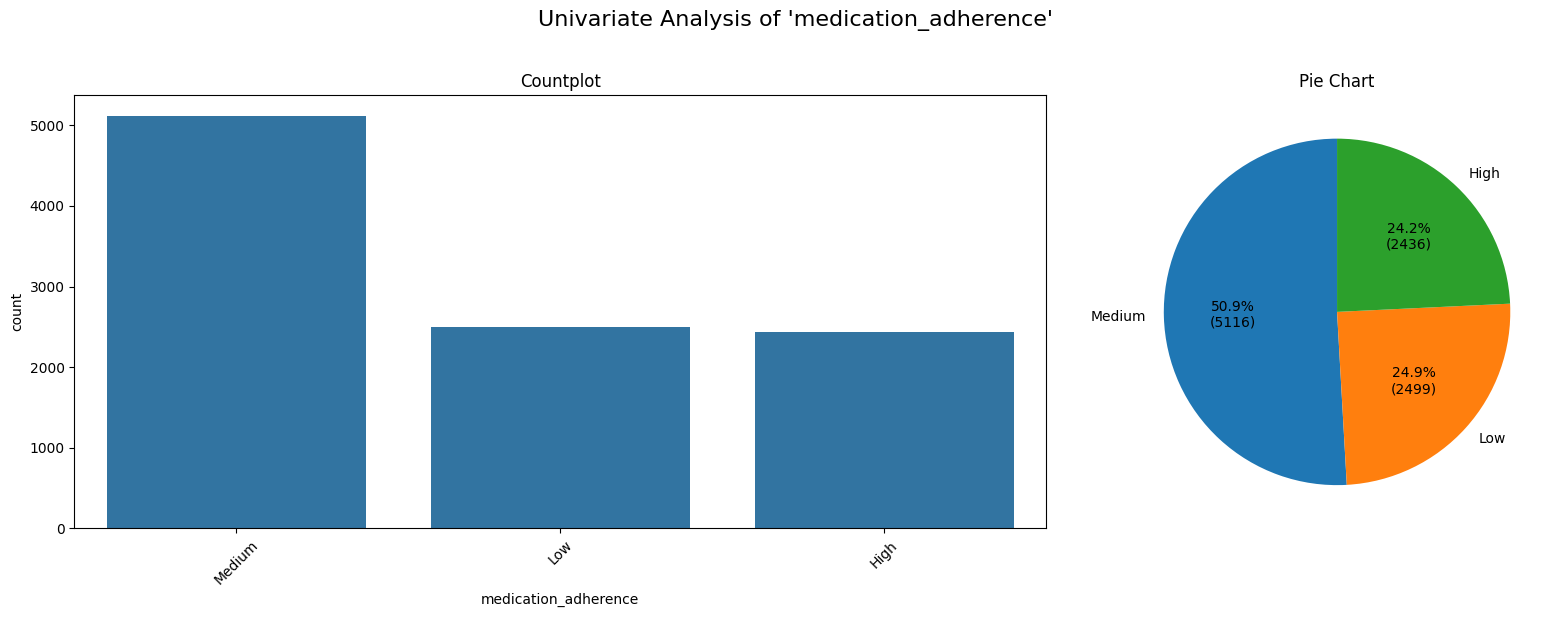

In [32]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="medication_adherence", show_plots=True)

**└─ 💡 Observations / Insights ──**

- All missing values are removed.

- The mislabelled columns are replaced.

---
---
# **🧼 12. Explore `socioeconomic_status`**

- A measure of the patient's economic and social position relative to others.

🔎 Univariate Analysis for 'socioeconomic_status' (Type: categorical)

📘 Data Type: object
💎 Unique Non-NA Values: 3
📋 Unique Values List: ['Low', 'Medium', 'High']
📊 Frequency Table:


,Count,Percentage (%)
Medium,"4,620",45.96
Low,"2,898",28.83
High,"2,534",25.21



✅ No rows with missing values found.


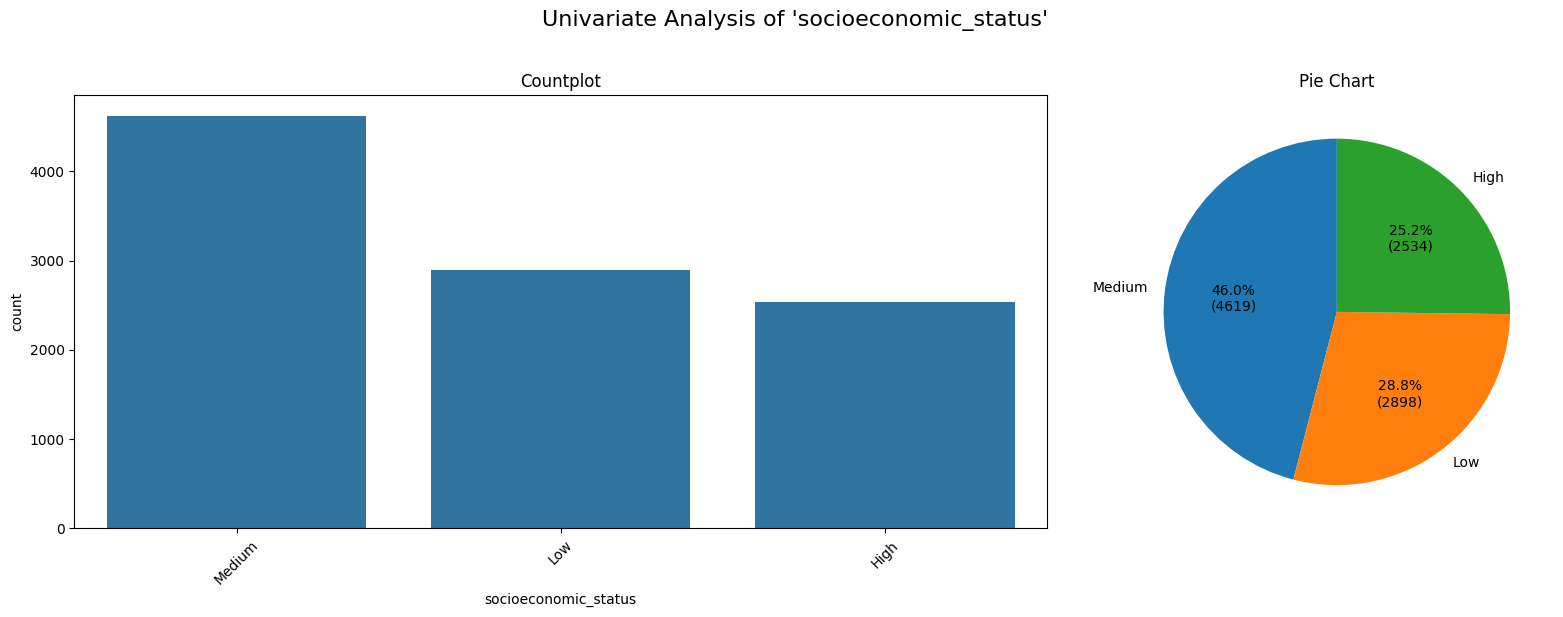

In [33]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="socioeconomic_status", show_plots=True)

**└─ 💡 Observations / Insights ──**

- No issues.

---
---
# **🧼 13. Explore `number_of_previous_admissions`**

- The total number of times the patient has been admitted to the hospital before.

🔎 Univariate Analysis for 'number_of_previous_admissions' (Type: numerical)

📘 Data Type: float64
💎 Unique Non-NA: 25
📊 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
number_of_previous_admissions,10052.00,0.77,68.49,-5034.00,1.00,2.00,3.00,1383.00


📈 Skewness: -57.62 ⚠️ (> 1.0)
📈 Kurtosis: 3847.27 ⚠️ (> 3.0)

🔍 Outlier Detection: IQR Method (1.5 × IQR)
   └── Bounds: [-2.00, 6.00]
   └── ⚠️ 19 outliers found (0.19% of rows)

✅ No rows with missing values found.


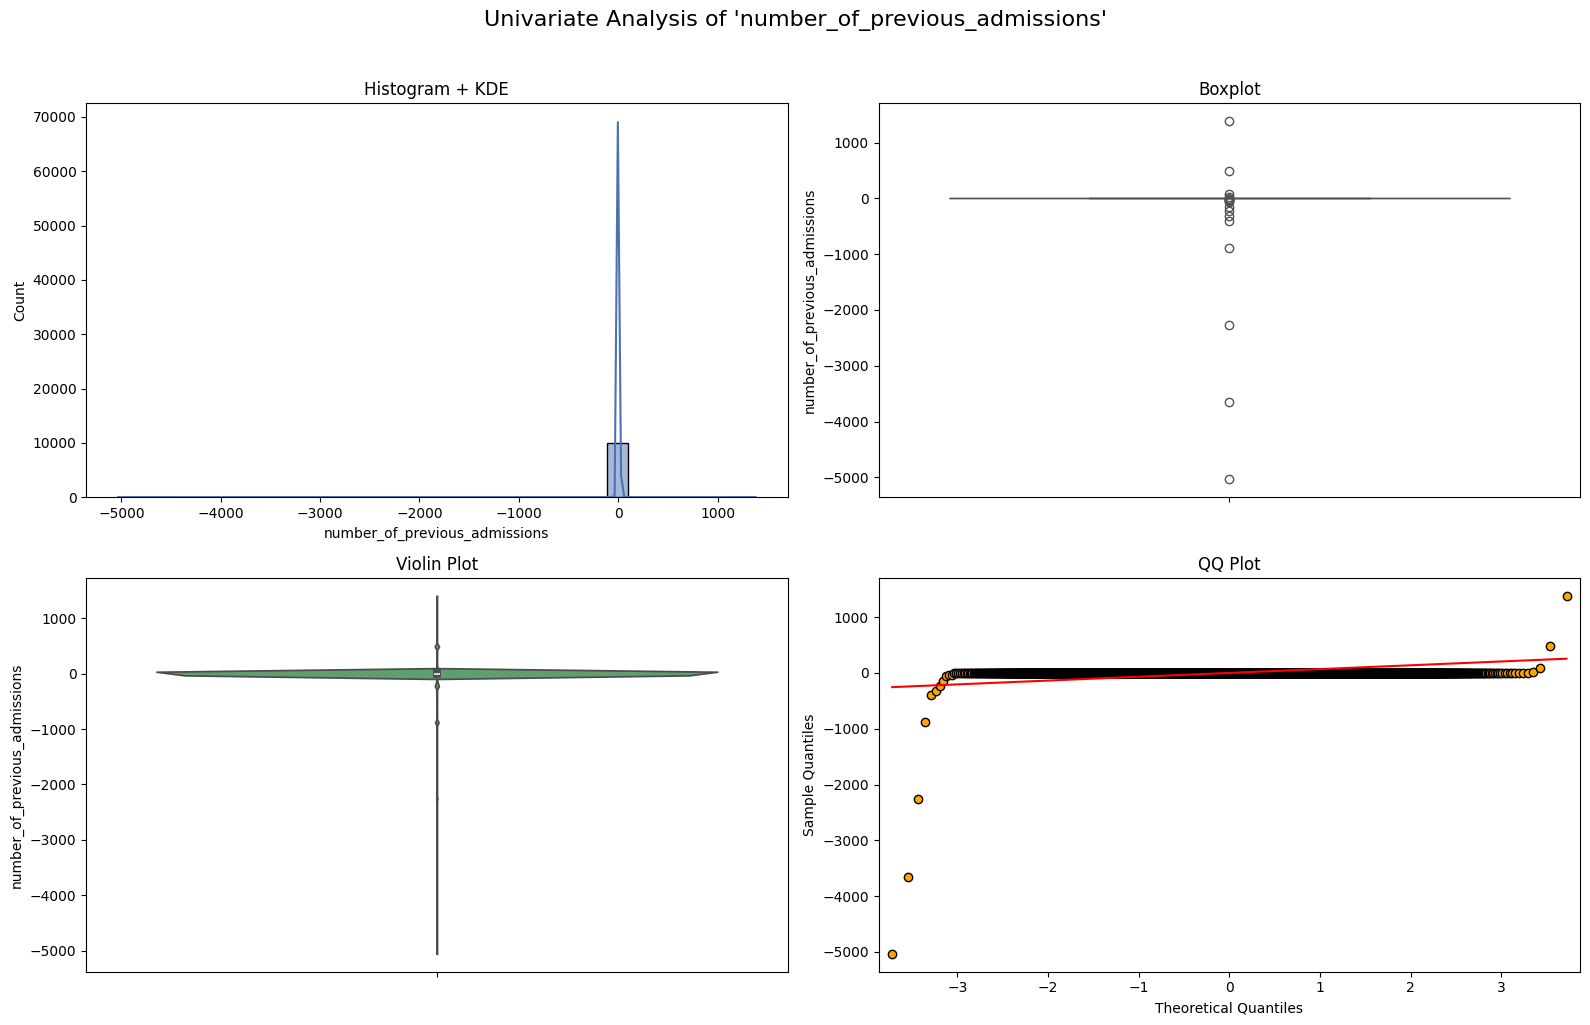

In [34]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="number_of_previous_admissions", show_plots=True)

**└─ 💡 Observations / Insights ──**

- There are negative and extremely high values.

- There are missing values that need to be removed.

In [35]:
df_negative = df_cleaned[df_cleaned["number_of_previous_admissions"] < 0]
df_negative

,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
134,0,50.0,Female,1.0,3,Non-smoker,Medium,Medium,-887.0
1024,0,52.0,Female,0.0,3,Non-smoker,Medium,Medium,-3651.0
1636,1,61.0,Female,3.0,7,Smoker,Low,Medium,-45.0
3912,1,71.0,Female,5.0,7,Smoker,Low,Low,-9.0
4539,1,65.0,Male,1.0,2,Smoker,Medium,Medium,-4.0
5358,0,52.0,Female,0.0,3,Non-smoker,High,Low,-3.0
5530,0,66.0,Female,3.0,3,Non-smoker,Medium,Medium,-232.0
5616,0,46.0,Male,1.0,2,Non-smoker,High,Medium,-6.0
7194,0,50.0,Male,1.0,3,Non-smoker,High,Medium,-401.0
7404,1,64.0,Male,2.0,3,Smoker,Low,Medium,-28.0


**└─ 💡 Observations / Insights ──**

- These values are assumed to be erroneous - to remove for simplicity and given the relative proportion as compared to the dataset.

In [36]:
df_high_positive = df_cleaned[df_cleaned["number_of_previous_admissions"] > 15]
df_high_positive

,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
1368,0,48.0,Male,3.0,3,Non-smoker,Medium,High,489.0
2706,1,56.0,Female,2.0,4,Non-smoker,Low,Medium,19.0
4391,1,71.0,Female,4.0,3,Smoker,Low,High,1383.0
7310,0,55.0,Male,2.0,5,Smoker,High,Medium,84.0


**└─ 💡 Observations / Insights ──**

- Assume that above 15 are erroneous and to remove.

---
## **└─ 🫧 Clean Feature (1)**

- Remove missing values
- Remove those negative values
- Remove those above 20

In [37]:
df_cleaned = cleaner.clean_all(df=df_cleaned, mode="clean_number_of_previous_admissions")
df_cleaned

   └── No missing values found in specified column(s). Nothing dropped.
   └── Removed 19 out-of-range rows in 'number_of_previous_admissions'.
   └── Cleaning mode='clean_number_of_previous_admissions' completed in 0.00 seconds


,risk_category,age,gender,comorbidities,length_of_stay,smoking_status,medication_adherence,socioeconomic_status,number_of_previous_admissions
0,1,63.0,Male,4.0,7,Non-smoker,Low,Low,5.0
1,1,67.0,Male,3.0,2,Non-smoker,Low,Low,4.0
2,0,34.0,Female,1.0,7,Non-smoker,Medium,Medium,5.0
3,1,63.0,Male,5.0,3,Smoker,Medium,Medium,2.0
4,1,45.0,Female,1.0,7,Smoker,High,Low,3.0
...,...,...,...,...,...,...,...,...,...
10095,0,54.0,Male,2.0,5,Non-smoker,High,Medium,1.0
10096,0,40.0,Male,0.0,7,Non-smoker,Medium,High,2.0
10097,0,33.0,Female,0.0,2,Non-smoker,Medium,High,3.0
10098,0,49.0,Male,0.0,7,Non-smoker,Medium,Medium,3.0


🔎 Univariate Analysis for 'number_of_previous_admissions' (Type: numerical)

📘 Data Type: float64
💎 Unique Non-NA: 6
📊 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
number_of_previous_admissions,10033.00,1.88,1.52,0.00,1.00,2.00,3.00,5.00


📈 Skewness: 0.41
📈 Kurtosis: -0.84

🔍 Outlier Detection: Z-Score Method (|z| > 3)
   └── Bounds: [-2.67, 6.43]
   └── ✅ No outliers detected.

✅ No rows with missing values found.


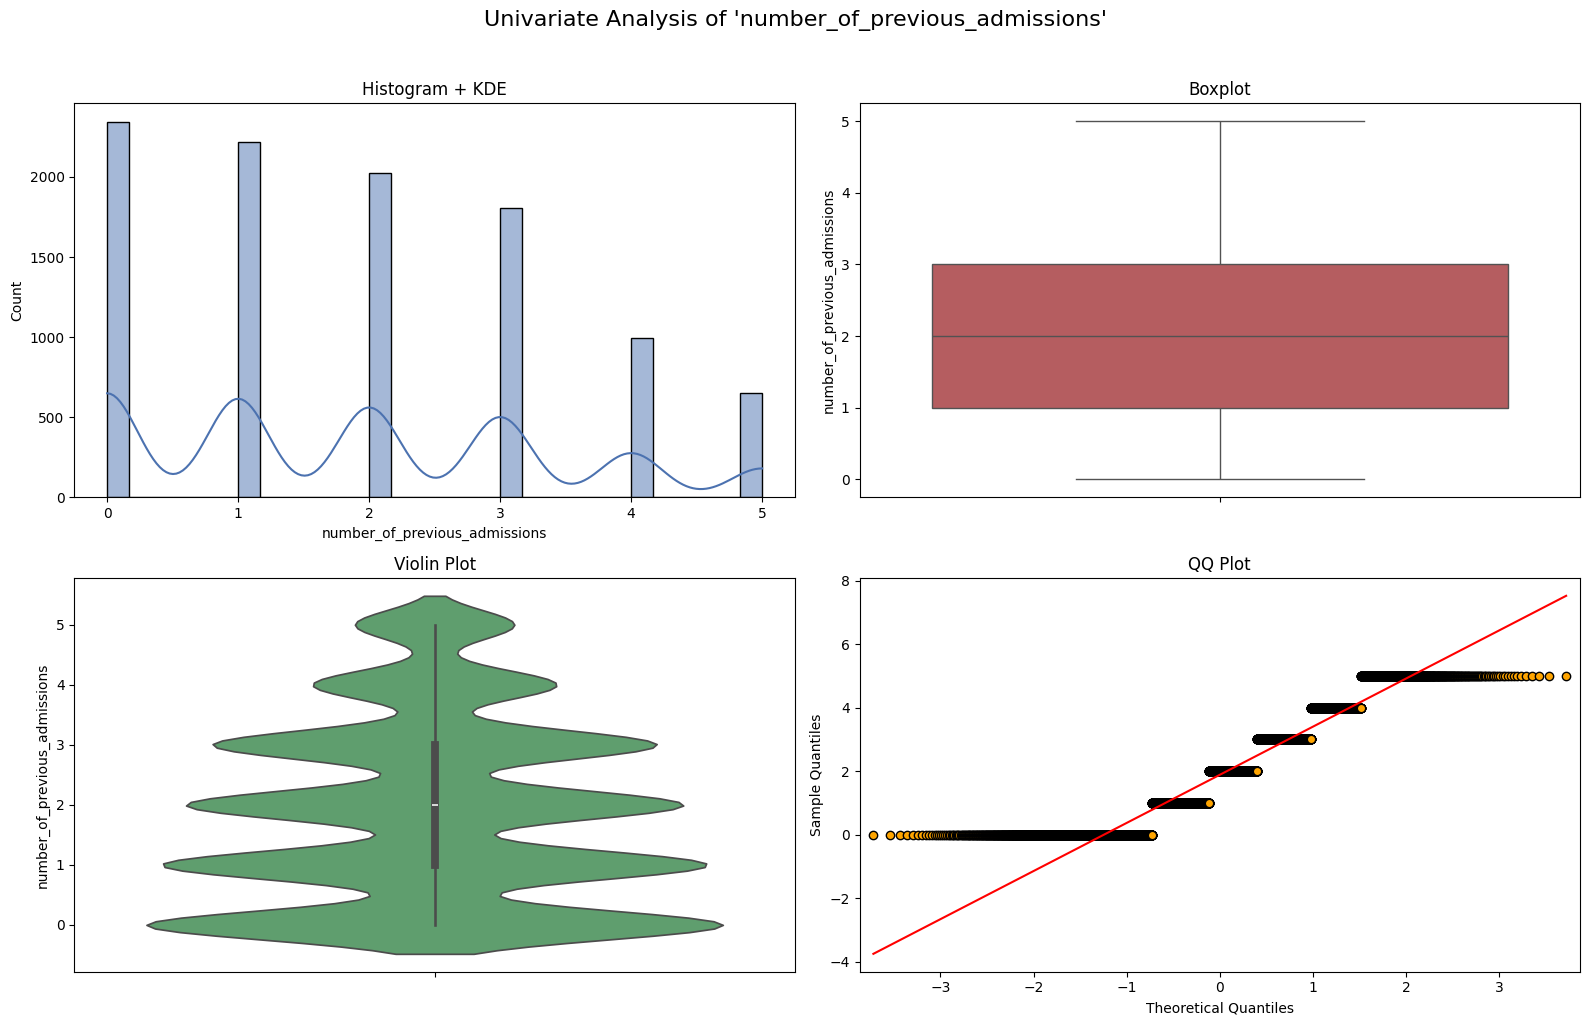

In [38]:
explorer.perform_univariate_analysis(df=df_cleaned, feature="number_of_previous_admissions", show_plots=True)

**└─ 💡 Observations / Insights ──**

- Looks good.

---
---
---